# CS7DS1 Data Analytics: Lab 2

## Reading and standardising the data

In [37]:
data <- read.csv('data.csv', fileEncoding='UTF-8-BOM')
species <- data[,1:5]
pollution <- data[,6]
depth <- data[,7]
temperature <- data[,8]
sediment <- data[,9]

standardise <- function(x) {
    x_std <- (x - mean(x)) / sd(x)
    return(x_std)
}

pollution_std <- standardise(pollution)
depth_std <- standardise(depth)
temperature_std <- standardise(temperature)

## Analysing the data

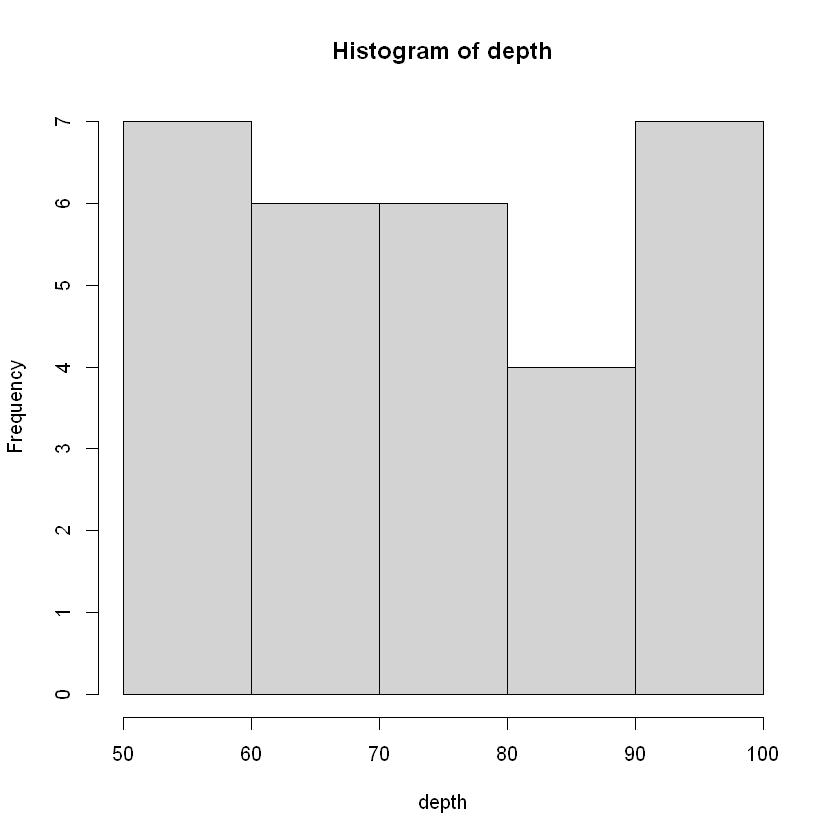

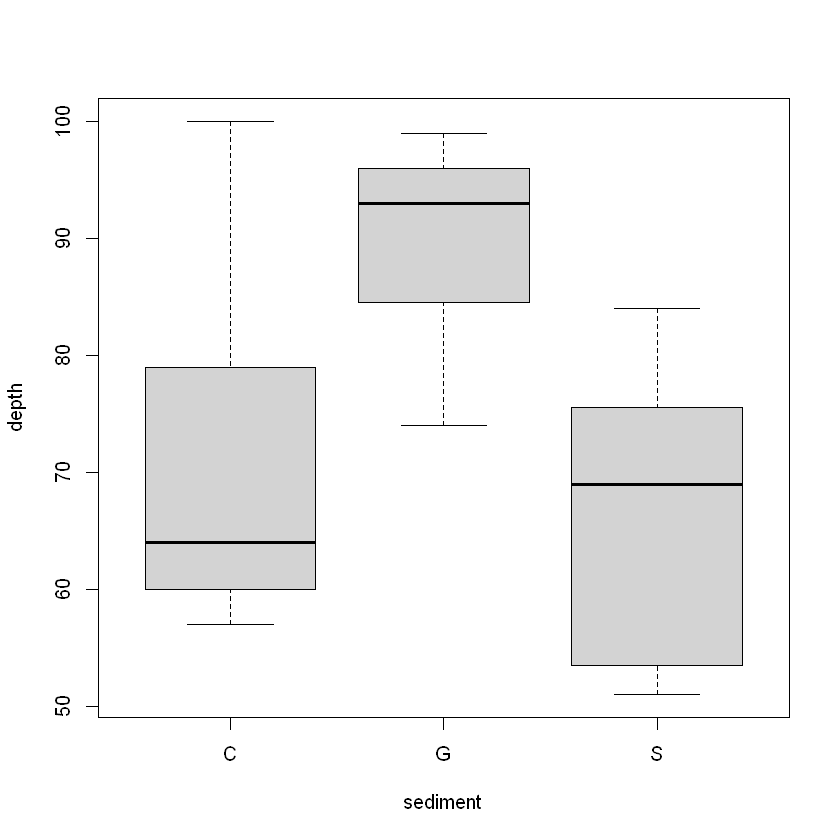

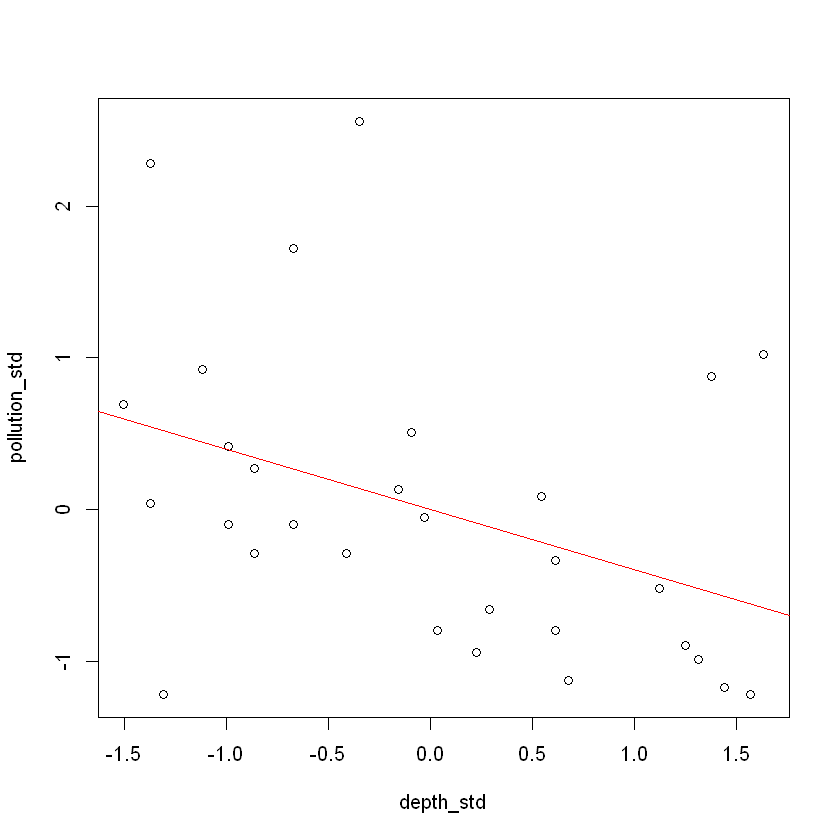

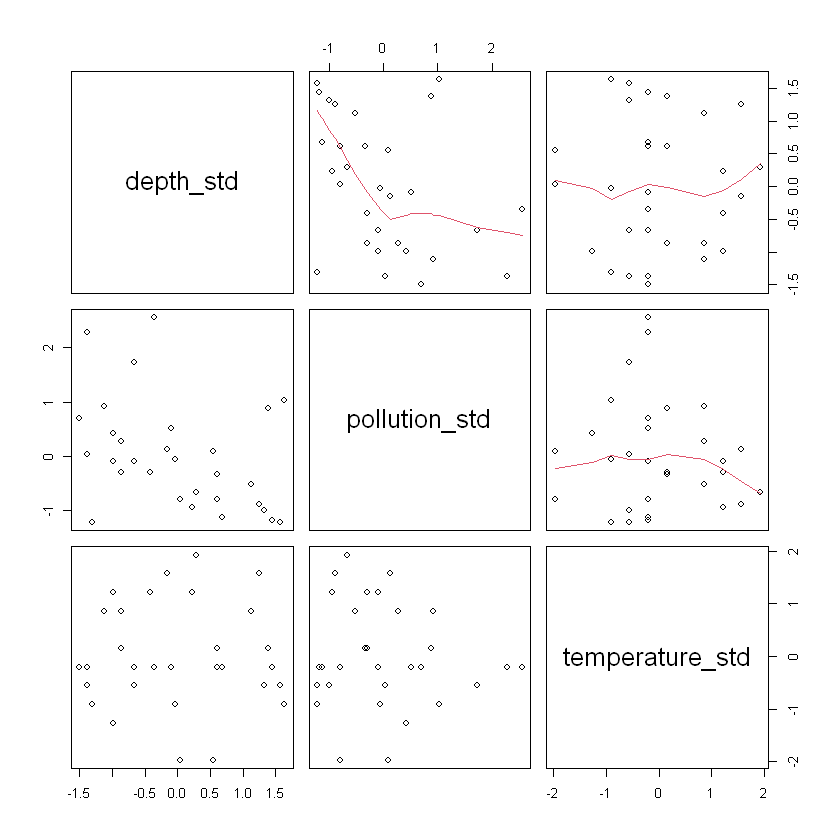

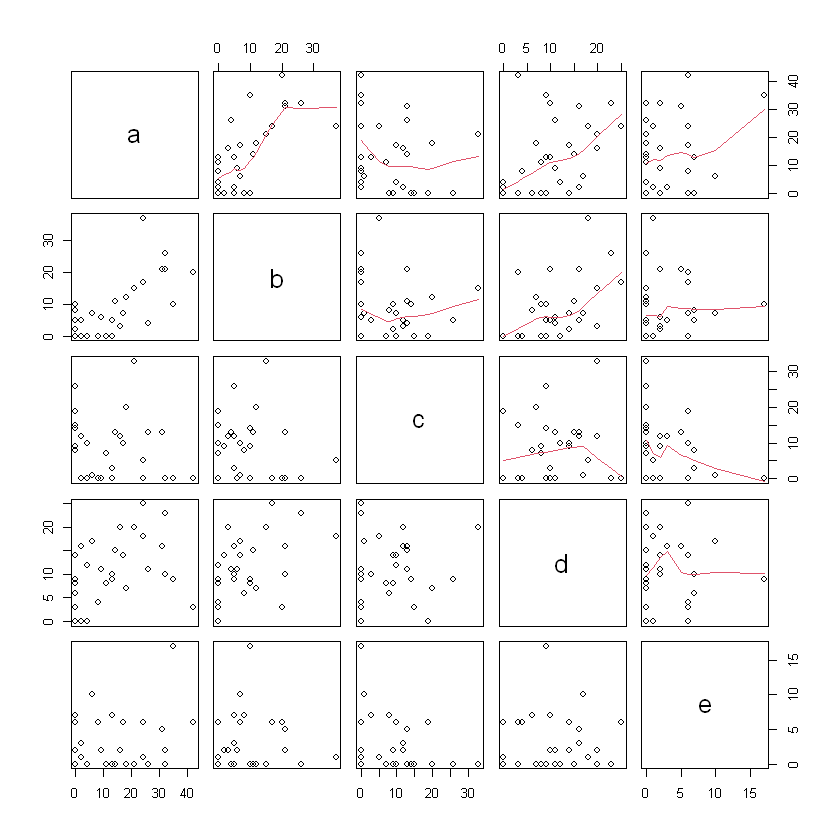

In [49]:
hist(depth)
boxplot(depth~sediment)
plot(depth_std, pollution_std)
abline(lm(pollution_std~depth_std), col='red')
all_std <- cbind(depth_std, pollution_std, temperature_std)
pairs(all_std, upper.panel=panel.smooth)
pairs(species, upper.panel=panel.smooth)

## Euclidean distances

In [56]:
all_std_dist <- dist(all_std, method='euclidean')
as.matrix(all_std_dist)[1:6,1:6]

,1,2,3,4,5,6
1,0.000000,3.681420,2.977153,2.708405,1.641906,1.743717
2,3.681420,0.000000,1.740695,2.979801,2.370523,3.759350
3,2.977153,1.740695,0.000000,1.522575,1.590632,3.850402
4,2.708405,2.979801,1.522575,0.000000,2.139034,3.883616
5,1.641906,2.370523,1.590632,2.139034,0.000000,2.618703
6,1.743717,3.759350,3.850402,3.883616,2.618703,0.000000


## Bray-Curtis distances

$$S = \{a,b,c,d,e\}$$
$$BC_{i,j} = 100 \cdot \frac{\Sigma_{s\in S} |data[s][i] - data[s][j]|}{\Sigma_{s \in S} data[s][i] + \Sigma_{s\in S} data[s][j]}$$

In [76]:
bc_dist <- function(species) {
    N <- 30
    bc_mat <- matrix(rep(0, N*N), nrow=N)
    for (i in 1:N) {
        for (j in 1:N) {
            bc_mat[i,j] <- 100 * sum(abs(species[i,] - species[j,])) / (sum(species[i,]) + sum(species[j,]))
        }
    }
    return(bc_mat)
}

bc_abundance <- bc_dist(species)
bc_abundance[1:6,1:6]

species_trans <- sqrt(sqrt(species))
bc_trans <- bc_dist(species_trans)
bc_trans[1:6,1:6]

for (i in 1:6) {
    print(cor(bc_abundance[,i], bc_trans[,i]))
}

0.00000,45.67901,29.62963,46.66667,47.69231,52.21239
45.67901,0.00000,48.14815,55.55556,34.78261,22.85714
29.62963,48.14815,0.00000,46.66667,50.76923,52.21239
46.66667,55.55556,46.66667,0.00000,78.57143,69.23077
47.69231,34.78261,50.76923,78.57143,0.00000,41.93548
52.21239,22.85714,52.21239,69.23077,41.93548,0.00000


0.00000,29.41310,18.07277,34.65176,22.70053,24.15216
29.41310,0.00000,23.26933,39.77534,17.36344,14.47452
18.07277,23.26933,0.00000,28.07792,32.46956,31.16911
34.65176,39.77534,28.07792,0.00000,53.81861,51.21006
22.70053,17.36344,32.46956,53.81861,0.00000,11.33747
24.15216,14.47452,31.16911,51.21006,11.33747,0.00000


[1] 0.847079
[1] 0.9337481
[1] 0.9319624
[1] 0.9319749
[1] 0.8475641
[1] 0.9063654


## Cluster analysis

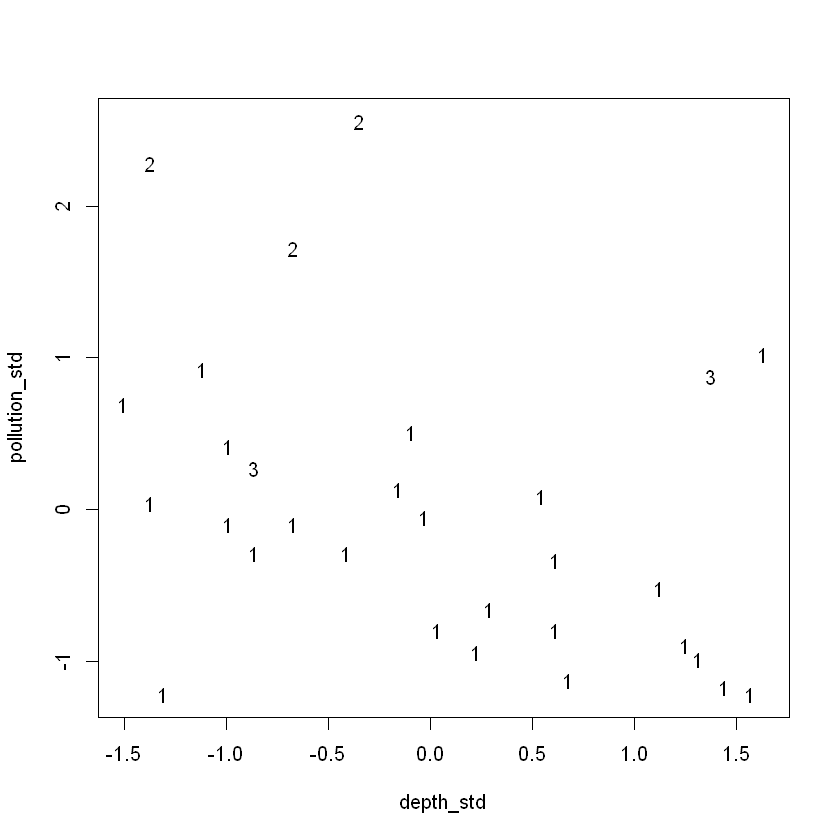

In [80]:
bc_clust <- hclust(as.dist(bc_abundance))
#plot(bc_clust)
plot(depth_std, pollution_std, type='n')
text(depth_std, pollution_std, cutree(bc_clust, 3))